In [31]:
# utilities
import numpy as np
import pandas as pd
import string
import os
from collections import Counter

# plotting utilties
import seaborn as sns
import matplotlib.pyplot as plt

# SMOTE utilities
import imblearn
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

from imblearn.over_sampling import SMOTE

# SKlearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
# Get base path
base_path  = os.path.normpath(os.getcwd() + os.sep + os.pardir)
# Set file path
file_path = base_path + '\\EmotionLabelled\\'

In [33]:
# Read the data set
df = pd.read_csv(file_path + 'tweets_emotion_labelled.csv')

print(df.head())
# Check for null values - needs to be zero
null_values = np.sum(df.isnull().any(axis=1))
print('----------------------')
print(f'Total Null values: {null_values}')
print('----------------------')

df1 = df.dropna()
null_values = np.sum(df1.isnull().any(axis=1))
print('----------------------------------------------')
print(f'Total Null values after dropping null rows: {null_values}')
print('----------------------------------------------')

# Some information about the data set
print('Length of data set: ', len(df1))
print('Shape of data set: ', df1.shape)
print('Dataset information')
print('-------------------')
df1.info()


   id                       date  \
0   2  2022-09-09 03:04:00+00:00   
1   3  2022-09-09 02:15:19+00:00   
2   4  2022-09-08 23:45:04+00:00   
3   5  2022-09-08 19:12:20+00:00   
4   6  2022-09-08 17:48:43+00:00   

                                             content  Emotion  
0  posted reposted from may they rest peace and p...      5.0  
1  reporting today with for the death queen eliza...      3.0  
2  the choir practicing tonight for longplanned m...      3.0  
3         rip your royal majesty cry toronto ontario      7.0  
4  the flags are being lowered half mast after th...      0.0  
----------------------
Total Null values: 21
----------------------
----------------------------------------------
Total Null values after dropping null rows: 0
----------------------------------------------
Length of data set:  4041
Shape of data set:  (4041, 4)
Dataset information
-------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4041 entries, 0 to 4061
Data columns (total 4

Text(0.5, 0, 'Emotion Types')

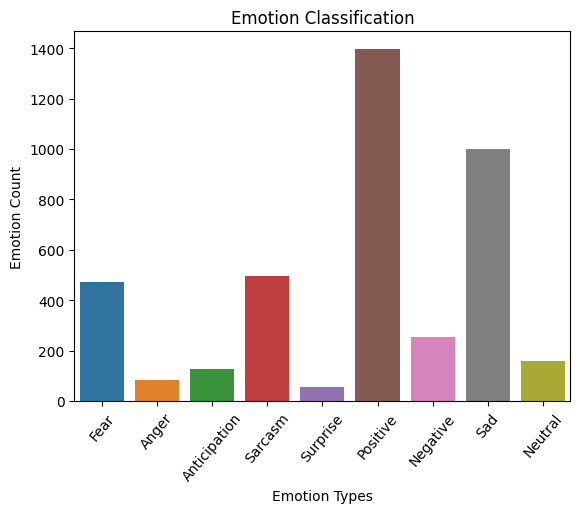

In [34]:
# Plotting the distribution for dataset.

ax = sns.countplot(x='Emotion', data=df)
ax.set_xticklabels(['Fear','Anger', 'Anticipation', 'Sarcasm', 'Surprise', 'Positive', 'Negative', 'Sad', 'Neutral'], rotation=50)
plt.title("Emotion Classification")
plt.ylabel("Emotion Count")
plt.xlabel("Emotion Types")

In [35]:
# Split input and output elements
X = df1['content']
y = df1['Emotion']

# Splitting data as train/test - 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)

print('Shape of train data', X_train.shape)
print('Shape of train data', X_test.shape)

Shape of train data (3232,)
Shape of train data (809,)


In [36]:
# Vectorize the data set (TF-IDF)

vectoriser = TfidfVectorizer(max_features=50000, analyzer='word',ngram_range=(1,3))
X_train_vect = vectoriser.fit_transform(X_train.astype('U'))
X_val_vect = vectoriser.fit_transform(X_test.astype('U'))
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  23170


In [37]:
# summarize emotions classes to determine minority classes
counter = Counter(y)

for emotion_type, emotion_count in sorted(counter.items()):
	percentage = emotion_count / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (emotion_type, emotion_count, percentage))

Class=0, n=471 (11.656%)
Class=1, n=85 (2.103%)
Class=2, n=127 (3.143%)
Class=3, n=495 (12.249%)
Class=4, n=54 (1.336%)
Class=5, n=1397 (34.571%)
Class=6, n=252 (6.236%)
Class=7, n=1000 (24.746%)
Class=10, n=160 (3.959%)


In [38]:
counter = Counter(y_train)
print('--------------------')
print('Before oversampling')
print('--------------------')
print(counter)
print('--------------------')

for emotion_type, emotion_count in sorted(counter.items()):
	percentage = emotion_count / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (emotion_type, emotion_count, percentage))

--------------------
Before oversampling
--------------------
Counter({5.0: 1135, 7.0: 785, 3.0: 392, 0.0: 375, 6.0: 204, 10.0: 130, 2.0: 104, 1.0: 64, 4.0: 43})
--------------------
Class=0, n=375 (11.603%)
Class=1, n=64 (1.980%)
Class=2, n=104 (3.218%)
Class=3, n=392 (12.129%)
Class=4, n=43 (1.330%)
Class=5, n=1135 (35.118%)
Class=6, n=204 (6.312%)
Class=7, n=785 (24.288%)
Class=10, n=130 (4.022%)


In [39]:
# SMOTE + ENN - hypbrid technique (oversampling + undersampling) - train data set
smote_enn = SMOTEENN()
X_train_smote, y_train_smote = smote_enn.fit_resample(X_train_vect, y_train)

counter_smote = Counter(y_train_smote)
print('--------------------------------')
print('After SMOTE + ENN oversampling')
print('--------------------------------')

for emotion_type, emotion_count in sorted(counter_smote.items()):
	percentage = emotion_count / len(y_train_smote) * 100
	print('Class=%d, n=%d (%.3f%%)' % (emotion_type, emotion_count, percentage))


--------------------------------
After SMOTE + ENN oversampling
--------------------------------
Class=0, n=1012 (11.892%)
Class=1, n=1134 (13.325%)
Class=2, n=1135 (13.337%)
Class=3, n=977 (11.481%)
Class=4, n=1135 (13.337%)
Class=5, n=237 (2.785%)
Class=6, n=1117 (13.126%)
Class=7, n=631 (7.415%)
Class=10, n=1132 (13.302%)
